In [219]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [220]:
from scipy.optimize import curve_fit

In [221]:
from math import pi

<img src='./viscosity/viscosity.png' width='50%'>

In [222]:
a=np.array([0.1279,0.1462])

In [223]:
f1={} # empty dictionary

for aa in a:
    f1[aa]=pd.read_csv(f'./viscosity/viscosity_a{aa}.csv')


In [224]:
f1[a[0]]

,M,h1,h2
0,83.9600,558.5,151.0
1,77.8500,558.5,198.0
2,68.6100,558.5,251.0
3,59.3050,558.5,300.5
4,49.8000,558.5,352.0
5,40.5650,558.5,400.0
6,29.5050,558.5,451.0
7,24.2200,558.5,471.0
8,18.2850,558.5,492.0
9,16.4150,558.5,500.0


In [225]:
f1[a[1]]

,M,h1,h2
0,111.5800,558.5,150
1,107.3200,558.5,200
2,96.8800,558.5,250
3,85.9700,558.0,300
4,73.6600,558.5,350
5,59.5450,558.5,400
6,44.7900,558.5,451
7,37.9500,558.5,470
8,31.0150,558.5,490
9,26.1800,559.0,502


v0=1/(pi*a^2*t)

v=v0/rho

eta=pi*a^4*rho*g*t/(8*l)

In [226]:
t=15
l=38.0
g=9.8

aa=a[0]
m=f1[aa]['M']
v0=1/(pi*aa**2*t)
v=v0*m
h1=f1[aa]['h1']/10
h2=f1[aa]['h2']/10
h=h1-h2

eta0=10**4*pi*g*aa**4*t/(8*l)
eta=eta0*(h/m)

In [227]:
h

0     40.75
1     36.05
2     30.75
3     25.80
4     20.65
5     15.85
6     10.75
7      8.75
8      6.65
9      5.85
10     4.75
11     3.80
12     2.85
13     1.90
dtype: float64

In [228]:
v

0     108.915630
1     100.989541
2      89.003113
3      76.932366
4      64.602172
5      52.622231
6      38.274841
7      31.418968
8      23.719894
9      21.294069
10     16.896452
11     13.948491
12      9.943286
13      5.772684
Name: M, dtype: float64

In [229]:
eta

0     1.973018
1     1.882446
2     1.821938
3     1.768496
4     1.685647
5     1.588377
6     1.481115
7     1.468621
8     1.478436
9     1.448741
10    1.482490
11    1.436647
12    1.511501
13    1.735679
dtype: float64

In [230]:
t=15
l=38.0
g=9.8

aa=a[1]
m=f1[aa]['M']
v0=1/(pi*aa**2*t)
V=v0*m
h1=f1[aa]['h1']/10
h2=f1[aa]['h2']/10
H=h1-h2

eta0=10**4*pi*g*aa**4*t/(8*l)
Eta=eta0*(h/m)

In [231]:
H

0     40.85
1     35.85
2     30.85
3     25.80
4     20.85
5     15.85
6     10.75
7      8.85
8      6.85
9      5.70
10     4.70
11     3.60
12     2.70
13     1.60
dtype: float64

In [232]:
V

0     110.777225
1     106.547874
2      96.182985
3      85.351479
4      73.130044
5      59.116596
6      44.467753
7      37.676964
8      30.791859
9      25.991645
10     21.295675
11     15.706181
12     11.725032
13      5.755789
Name: M, dtype: float64

In [233]:
Eta

0     2.534687
1     2.331351
2     2.202897
3     2.082840
4     1.945680
5     1.847426
6     1.665753
7     1.600219
8     1.488103
9     1.550848
10    1.536914
11    1.667095
12    1.674858
13    2.274552
dtype: float64

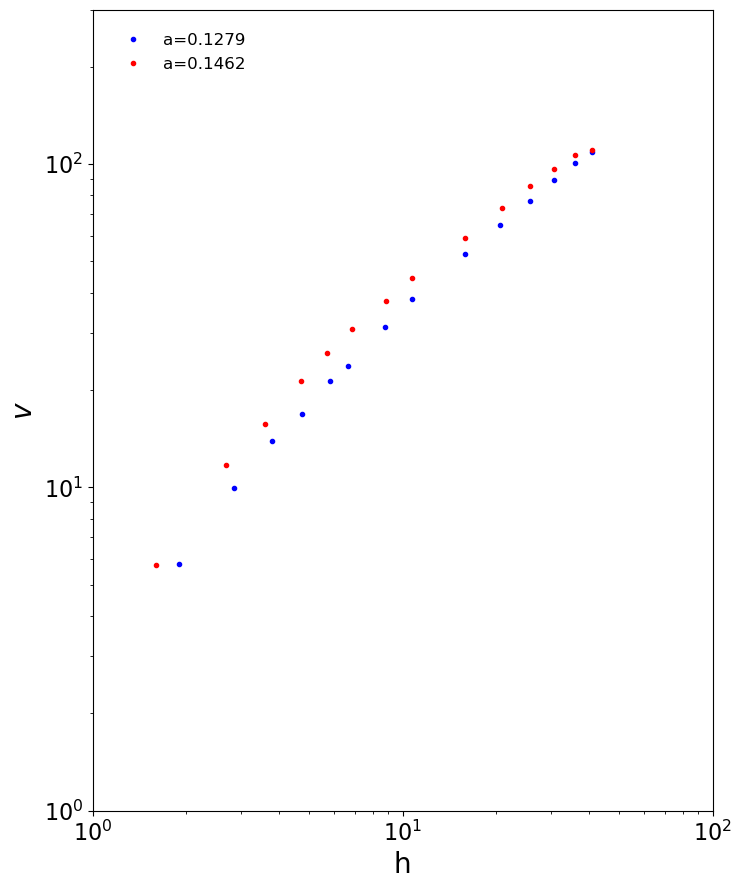

In [234]:
r=8
fig=plt.figure(figsize=(r*1,r*1.3))

plt.xlabel('h',fontsize=20)
plt.ylabel('$v$',fontsize=20)
plt.xscale('log')
plt.yscale('log')


plt.xlim(1,100)
plt.ylim(1,300)
plt.tick_params(labelsize=16)

plt.plot(h,v,'b.',label=f'a={a[0]}')
plt.plot(H,V,'r.',label=f'a={a[1]}')

legend=plt.legend(bbox_to_anchor=(0.0,1.0), loc='upper left', borderaxespad=1, fontsize=12, ncol=1)
frame = legend.get_frame()
frame.set_linewidth(0)

plt.show()

In [235]:
def func(x, a, b):
    return a*10**(b*np.log10(x))

In [178]:
H[:6] #0始まりで6個の値

0    40.85
1    35.85
2    30.85
3    25.80
4    20.85
5    15.85
dtype: float64

In [244]:
popt, pcov = curve_fit(func, H[:6],V[:6])

In [245]:
popt[0],np.sqrt(pcov[0,0])

(9.94935492341694, 1.2517851533019348)

In [246]:
H[7:-1]

7     8.85
8     6.85
9     5.70
10    4.70
11    3.60
12    2.70
dtype: float64

In [247]:
popt2, pcov2 = curve_fit(func, H[7:-1],V[7:-1])

In [248]:
popt2[0],np.sqrt(pcov2[0,0])

(4.78639485359553, 0.3499518924007971)

In [249]:
popt3, pcov3 = curve_fit(func, h[:5],v[:5])

In [250]:
popt4, pcov4 = curve_fit(func, h[6:-1],v[6:-1])

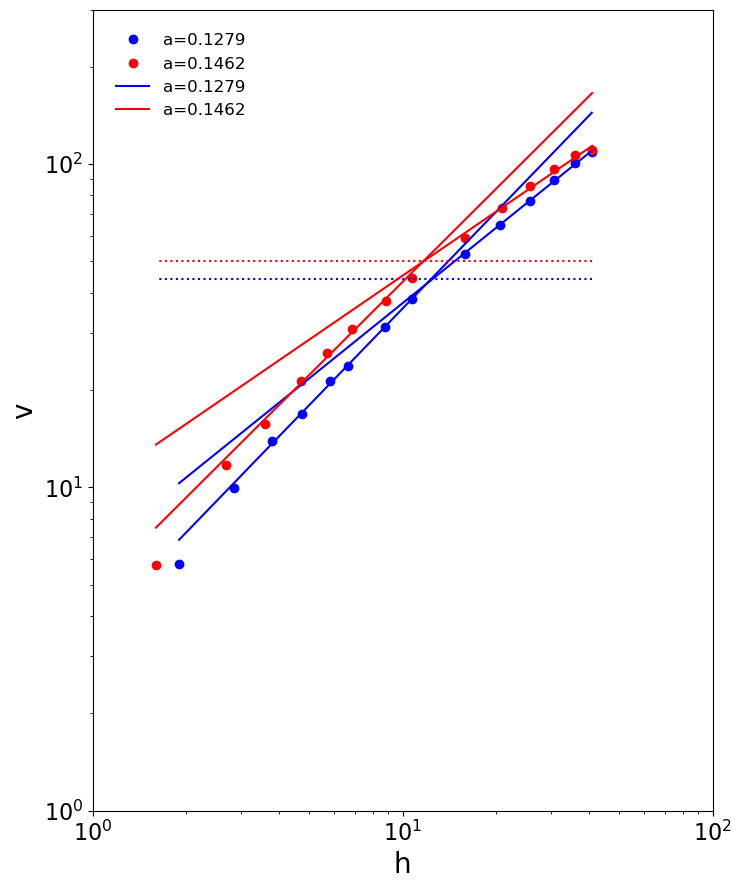

In [251]:
r=8
fig=plt.figure(figsize=(r*1,r*1.3))

plt.xlabel('h',fontsize=20)
plt.ylabel('v',fontsize=20)
plt.xscale('log')
plt.yscale('log')


plt.xlim(1,100)
plt.ylim(1,300)
plt.tick_params(labelsize=16)

plt.plot(h,v,'bo',label=f'a={a[0]}')
plt.plot(H,V,'ro',label=f'a={a[1]}')


label=f'a={a[0]}'
plt.plot(H,44*np.ones(len(H)),'b:')
plt.plot(h,func(h,*popt3),'b-',label=label)
plt.plot(h,func(h,*popt4),'b-')

label=f'a={a[1]}'
plt.plot(H,50*np.ones(len(H)),'r:')
plt.plot(H,func(H,*popt),'r-',label=label)
plt.plot(H,func(H,*popt2),'r-')

legend=plt.legend(bbox_to_anchor=(0.0,1.0), loc='upper left', borderaxespad=1, fontsize=12, ncol=1)
frame = legend.get_frame()
frame.set_linewidth(0)

plt.show()

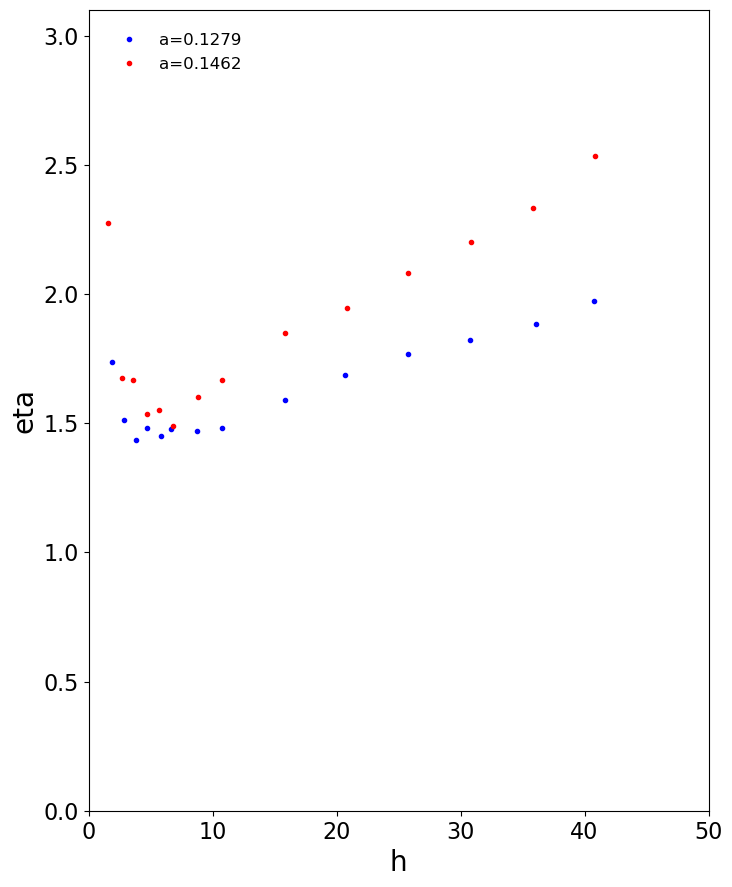

In [195]:
r=8
fig=plt.figure(figsize=(r*1,r*1.3))
plt.xlabel('h',fontsize=20)
plt.ylabel('eta',fontsize=20)
#plt.xscale('log')
#plt.yscale('log')


plt.xlim(0,50)
plt.ylim(0,3.1)
plt.tick_params(labelsize=16)

plt.plot(h,eta,'b.',label=f'a={a[0]}')
plt.plot(H,Eta,'r.',label=f'a={a[1]}')

legend=plt.legend(bbox_to_anchor=(0.0,1.0), loc='upper left', borderaxespad=1, fontsize=12, ncol=1)
frame = legend.get_frame()
frame.set_linewidth(0)

plt.show()

In [196]:
def func(x, a, b):
    return a*x+b

In [197]:
popt, pcov = curve_fit(func, h[4:7],eta[4:7])

In [198]:
popt[1],np.sqrt(pcov[1,1])

(1.2595932441669968, 0.0035975828526755636)

# eta= 1.23 mPas at T=12 C, 1.27 mPas at T=11 C

## 問　同様に太管の粘性を推定せよ. 

In [ ]:
## ここに最小二乗法のコードを追加










In [199]:
popt2, pcov2 = curve_fit(func, H[5:9],Eta[5:9])

In [200]:
popt2[1],np.sqrt(pcov2[1,1])

(1.240427634177305, 0.03164406914906221)

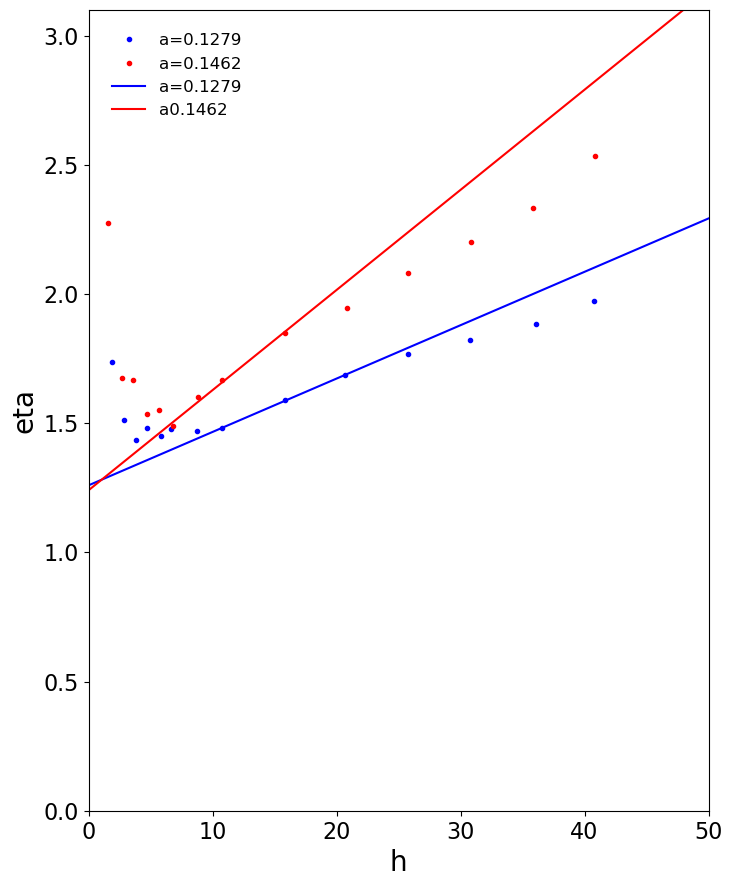

In [205]:
r=8
fig=plt.figure(figsize=(r*1,r*1.3))
plt.xlabel(f'h',fontsize=20)
plt.ylabel(f'eta',fontsize=20)
#plt.xscale('log')
#plt.yscale('log')

plt.xlim(0,50)
plt.ylim(0,3.1)
plt.tick_params(labelsize=16)

plt.plot(h,eta,'b.',label=f'a={a[0]}')
plt.plot(H,Eta,'r.',label=f'a={a[1]}')

x=np.linspace(0,50,100)

plt.plot(x,func(x,*popt),'b-',label=f'a={a[0]}')
plt.plot(x,func(x,*popt2),'r-',label=f'a{a[1]}')

legend=plt.legend(bbox_to_anchor=(0.0,1.0), loc='upper left', borderaxespad=1, fontsize=12, ncol=1)
frame = legend.get_frame()
frame.set_linewidth(0)

plt.show()

In [215]:
re=2*(a[0]/100)*1000*(44/100)/(popt[1]/1000)

In [216]:
re

893.5583016280284

In [217]:
re=2*(a[1]/100)*1000*(50/100)/(popt2[1]/1000)

In [218]:
re

1178.625789782287